In [40]:
import tensorflow as tf

In [19]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [27]:
celsius_q = np.array([], dtype=float)
fahrenheit_a = np.array([], dtype=float)
with open('./temperatureData.txt', 'r') as f:
    for line in f:
        c, f = map(float, line.strip().split())
        celsius_q = np.append(celsius_q, c)
        fahrenheit_a = np.append(fahrenheit_a, f)


In [47]:
INPUT_SIZE = 1000

celsius_q = np.empty(INPUT_SIZE)
fahrenheit_a = np.empty(INPUT_SIZE)

def celcius_to_fahrenheit(celcius):
    return (9/5) * celcius + 32

for i in range(INPUT_SIZE):
    fahrenheit_a[i] = celcius_to_fahrenheit(i)
    celsius_q[i] = i

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

In [49]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [50]:
history = model.fit(celsius_q, fahrenheit_a, epochs=1000, verbose=False)
print("Finished training the model")

2023-01-01 23:59:03.460542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Finished training the model


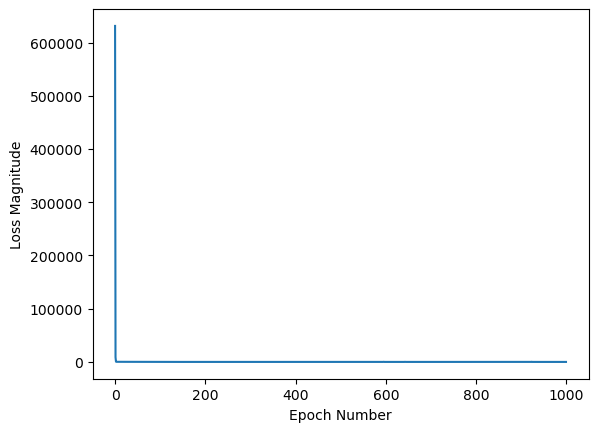

In [51]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [53]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 132ms/step
[[212.]]


In [54]:
!mkdir -p saved_model
model.save('saved_model/my_model')